# Beefed-up clf version2 RF 


interestingly it picked amna for the top 2 photos and some of the other choices are bit more sensible but still can't be too sure on RF probabilities, deosn't provide the precision needed however, the groupings are fairly solid.


In [10]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [11]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


In [12]:
lr = pickle.load(open('rf_tinderlikes2.pickle','rb'))
lr

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

count    35.000000
mean      0.431429
std       0.196695
min       0.100000
25%       0.250000
50%       0.400000
75%       0.600000
max       0.800000
dtype: float64
skew --  -0.023969714613215152
kurtosis -- -1.1706945043066854


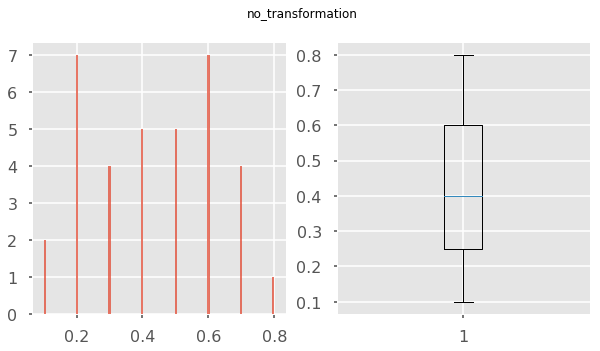

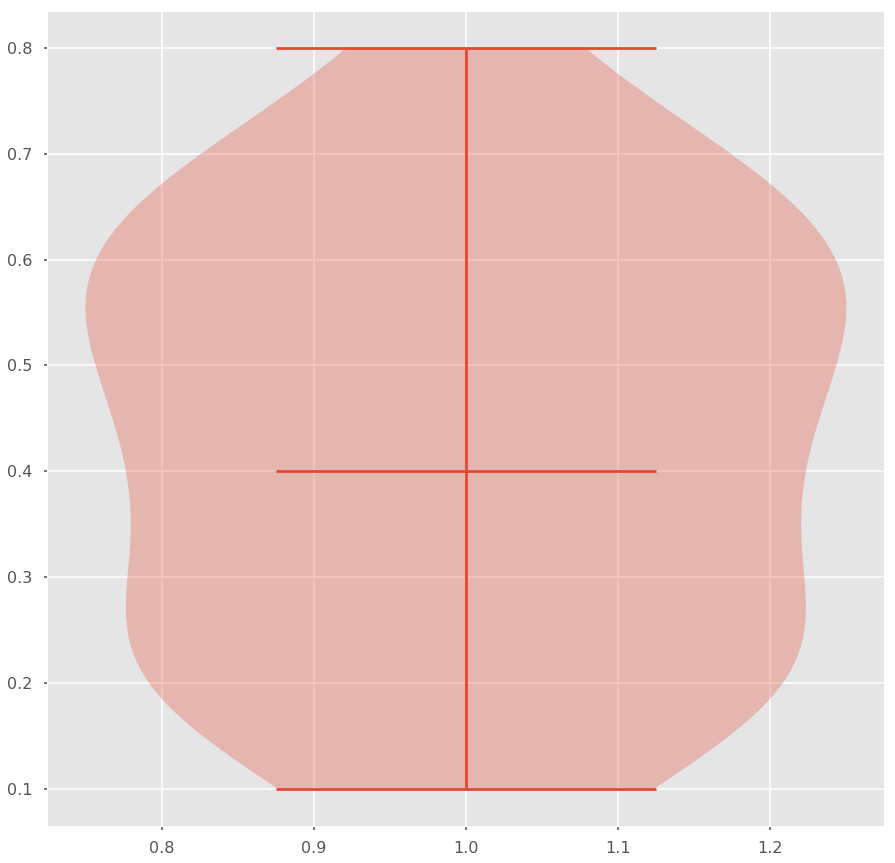

In [13]:

probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [14]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
9


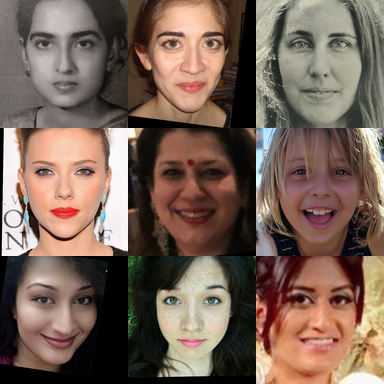

2
9


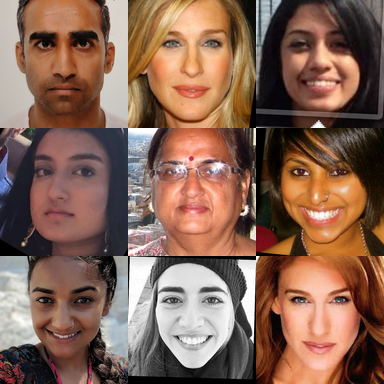

3
12


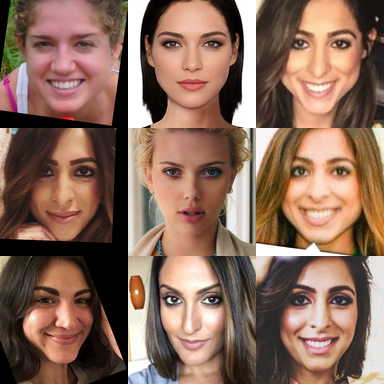

4
5


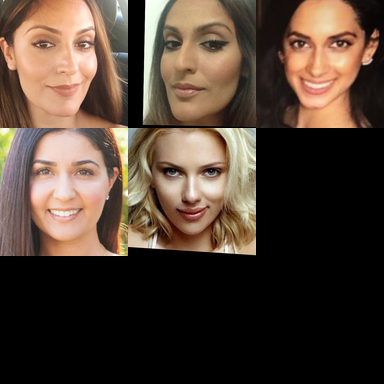

In [15]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
9


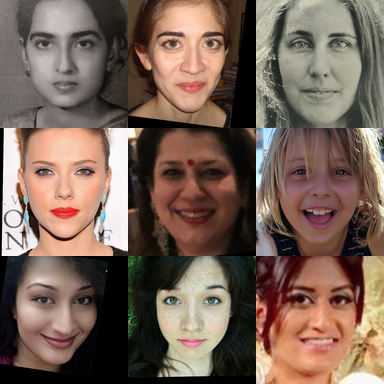

2
9


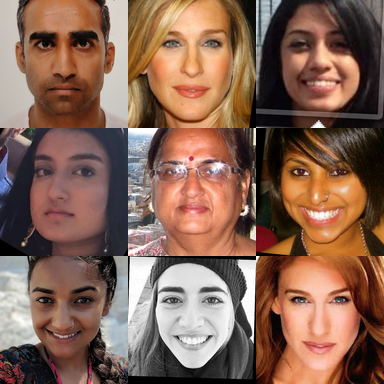

3
12


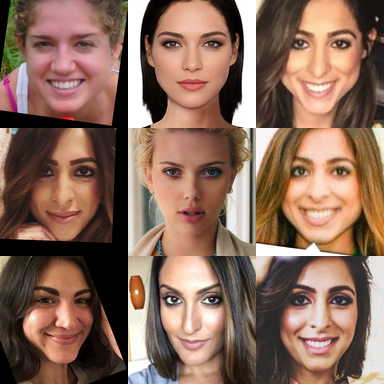

4
5


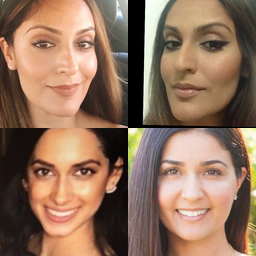

In [16]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


# Individual rankings
scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


The b/w photos seemed to have ranked much lower... try including only colored photos of people


0.8


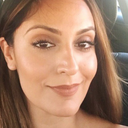

0.7


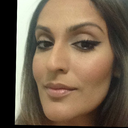

0.7


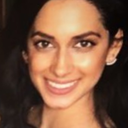

0.7


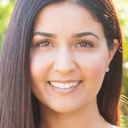

0.7


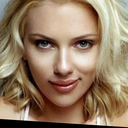

0.6


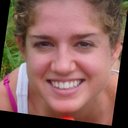

0.6


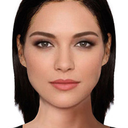

0.6


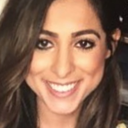

0.6


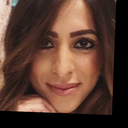

0.6


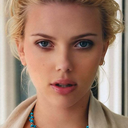

0.6


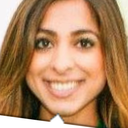

0.6


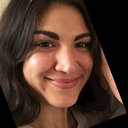

0.5


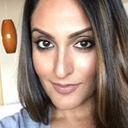

0.5


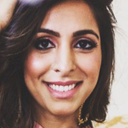

0.5


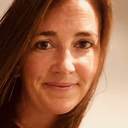

0.5


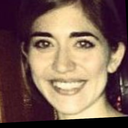

0.5


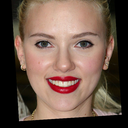

0.4


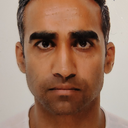

0.4


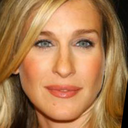

0.4


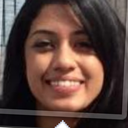

0.4


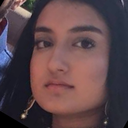

0.4


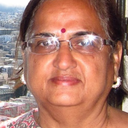

0.3


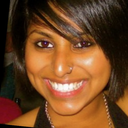

0.3


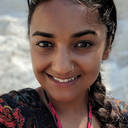

0.3


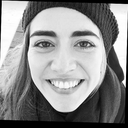

0.3


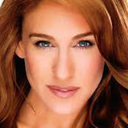

0.2


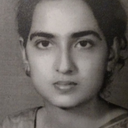

0.2


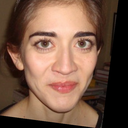

0.2


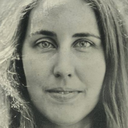

0.2


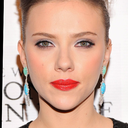

0.2


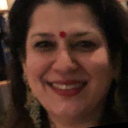

0.2


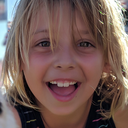

0.2


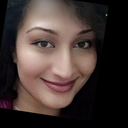

0.1


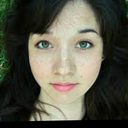

0.1


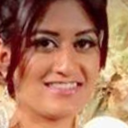

In [17]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    